# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup places to store results
df = pd.DataFrame(cities,columns =['City']) 
df["City Number"] = ""
df["City Name"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Date"] = ""

In [4]:
# Perform a weather check on each city using a series of successive API calls.


for index, row in df.iterrows():
    
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    city = row['City']
           
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # make request
    response = requests.get(query_url).json()
    
# Include a print log of each city as it'sbeing processed (with the city number and city name).
    try:
        df.loc[index, 'City Number'] = response["id"]
        df.loc[index, 'City Name'] = response["name"]
        df.loc[index, 'Lat'] = response["coord"]["lat"]
        df.loc[index, 'Lng'] = response["coord"]["lon"]
        df.loc[index, 'Max Temp'] = response["main"]["temp_max"]
        df.loc[index, 'Humidity'] = response["main"]["humidity"]
        df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] = response["wind"]["speed"]
        df.loc[index, 'Country'] = response["sys"]["country"]
        df.loc[index, 'Date'] = response["dt"]

        
        print(f"Processing Record {index} of Set 1 | {row['City']}")
        
    except (KeyError, IndexError):
        print(f"City not found. Skipping...{index}.")
                

Processing Record 0 of Set 1 | hilo
Processing Record 1 of Set 1 | vestmanna
Processing Record 2 of Set 1 | san miguel
Processing Record 3 of Set 1 | freeport
City not found. Skipping...4.
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | gioia del colle
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bridlington
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | rikitea
City not found. Skipping...13.
Processing Record 14 of Set 1 | busselton
City not found. Skipping...15.
Processing Record 16 of Set 1 | bordei verde
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | bambous virieux
City not found. Skipping...19.
Processing Record 20 of Set 1 | chatham
Processing Record 21 of Set 1 | asyut
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | albany
Processing Record 24 of Set 1 | abaza
Processing Record 

City not found. Skipping...202.
Processing Record 203 of Set 1 | clarence town
City not found. Skipping...204.
Processing Record 205 of Set 1 | henties bay
Processing Record 206 of Set 1 | tiksi
Processing Record 207 of Set 1 | raymond
Processing Record 208 of Set 1 | aswan
Processing Record 209 of Set 1 | mehamn
Processing Record 210 of Set 1 | aklavik
Processing Record 211 of Set 1 | kaya
Processing Record 212 of Set 1 | coihaique
Processing Record 213 of Set 1 | lisakovsk
Processing Record 214 of Set 1 | alanya
Processing Record 215 of Set 1 | nanortalik
Processing Record 216 of Set 1 | ryotsu
Processing Record 217 of Set 1 | zhigansk
Processing Record 218 of Set 1 | the valley
Processing Record 219 of Set 1 | myitkyina
Processing Record 220 of Set 1 | chiredzi
Processing Record 221 of Set 1 | zhigalovo
Processing Record 222 of Set 1 | nusaybin
Processing Record 223 of Set 1 | marawi
Processing Record 224 of Set 1 | kaitangata
Processing Record 225 of Set 1 | evans
City not found. S

Processing Record 399 of Set 1 | kieta
Processing Record 400 of Set 1 | nantucket
Processing Record 401 of Set 1 | kontagora
Processing Record 402 of Set 1 | turukhansk
Processing Record 403 of Set 1 | sorland
Processing Record 404 of Set 1 | honningsvag
Processing Record 405 of Set 1 | richards bay
Processing Record 406 of Set 1 | constantine
City not found. Skipping...407.
Processing Record 408 of Set 1 | manado
Processing Record 409 of Set 1 | roald
Processing Record 410 of Set 1 | mangan
Processing Record 411 of Set 1 | asau
Processing Record 412 of Set 1 | fengzhen
Processing Record 413 of Set 1 | nara
Processing Record 414 of Set 1 | caboolture
Processing Record 415 of Set 1 | severnyy
Processing Record 416 of Set 1 | kemijarvi
Processing Record 417 of Set 1 | bandarban
Processing Record 418 of Set 1 | port lincoln
Processing Record 419 of Set 1 | ozinki
City not found. Skipping...420.
Processing Record 421 of Set 1 | sobolevo
Processing Record 422 of Set 1 | kasongo-lunda
Proces

Processing Record 597 of Set 1 | krasnoselkup
Processing Record 598 of Set 1 | rawatsar
Processing Record 599 of Set 1 | mikropolis
Processing Record 600 of Set 1 | chabahar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export Data to csv
df.to_csv(output_data_file)

#Display DataFrame
cities_df = df[df['Max Temp'] != ""]

cities_df.set_index(["City"])

cities_df["Lat"] = cities_df["Lat"].astype(float)
cities_df["Lng"] = cities_df["Lng"].astype(float)
cities_df["Max Temp"] = cities_df["Max Temp"].astype(float)
cities_df["Humidity"] = cities_df["Humidity"].astype(float)
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(float)
cities_df["Wind Speed"] = cities_df["Wind Speed"].astype(float)
cities_df["Date"] = cities_df["Date"].astype(float)

cities_df.count()

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

City           552
City Number    552
City Name      552
Lat            552
Lng            552
Max Temp       552
Humidity       552
Cloudiness     552
Wind Speed     552
Country        552
Date           552
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Skip this step if there are no cities that have humidity > 100%.
humidity_cities_df = cities_df[cities_df["Humidity"] > 100]

In [7]:
# describe numeric values
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,21.693859,22.934420,68.035707,70.996377,49.367754,7.982301,1.597887e+09
std,32.860622,89.428718,13.061734,20.270135,40.487464,5.493912,1.437917e+02
min,-54.800000,-175.200000,36.280000,15.000000,0.000000,0.340000,1.597887e+09
25%,-3.512500,-54.135000,59.000000,58.000000,1.000000,3.732500,1.597887e+09
50%,26.795000,27.050000,68.910000,75.000000,47.000000,6.930000,1.597888e+09
75%,48.650000,101.890000,78.542500,87.000000,90.000000,10.597500,1.597888e+09
max,78.220000,179.320000,97.210000,100.000000,100.000000,33.330000,1.597888e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_cities_df.index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_cities_df.index, inplace=False)
clean_city_data.head()

,City,City Number,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,5855927,Hilo,19.73,-155.09,82.40,65.0,90.0,10.29,US,1.597887e+09
1,vestmanna,2610343,Vestmanna,62.16,-7.17,51.80,76.0,100.0,11.41,FO,1.597887e+09
2,san miguel,3583446,San Miguel,13.48,-88.18,75.63,90.0,100.0,2.06,SV,1.597887e+09
3,freeport,5117949,Freeport,40.66,-73.58,70.00,88.0,20.0,3.36,US,1.597887e+09
5,airai,1651810,Airai,-8.93,125.41,76.55,29.0,3.0,3.49,TL,1.597887e+09


In [10]:
# Extract relevant fields from the data frame
plot_data = clean_city_data[["City Name","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country"]]


# Export the City_Data into a csv
plot_data.to_csv("output_data/city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

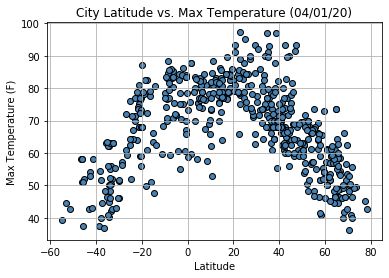

In [11]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Max Temp"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

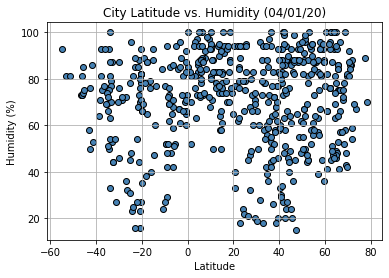

In [12]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Humidity"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

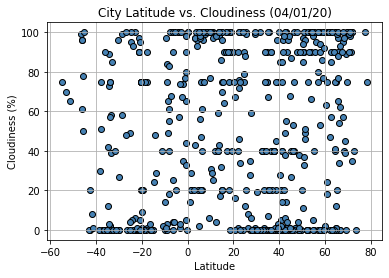

In [13]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Cloudiness"] 

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("output_data/Lat_vs_Clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

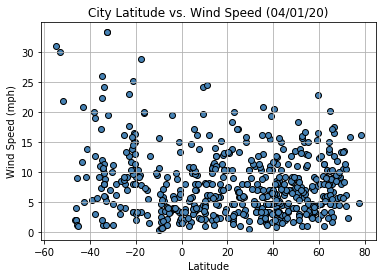

In [14]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Wind Speed"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
northern_hemisphere = plot_data.loc[plot_data['Lat'] > 0]
southern_hemisphere = plot_data.loc[plot_data['Lat'] < 0]

In [16]:
northern_hemisphere.sort_values("Max Temp")

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
11,Chokurdakh,70.63,147.92,36.28,92.0,100.0,10.51,RU
70,Batagay-Alyta,67.80,130.41,39.94,71.0,95.0,5.64,RU
206,Tiksi,71.69,128.87,39.97,88.0,100.0,6.22,RU
91,Galich,58.38,42.35,40.89,81.0,0.0,3.40,RU
195,Barrow,71.29,-156.79,41.00,86.0,90.0,11.41,US
...,...,...,...,...,...,...,...,...
494,Adrar,20.50,-10.07,93.27,33.0,16.0,13.31,MR
28,Dubai,25.26,55.30,95.00,75.0,12.0,5.82,AE
318,Laguna,38.42,-121.42,97.00,18.0,75.0,4.70,US
413,Nara,34.69,135.80,97.00,56.0,75.0,2.24,JP


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.52
The rvalue is: -0.72


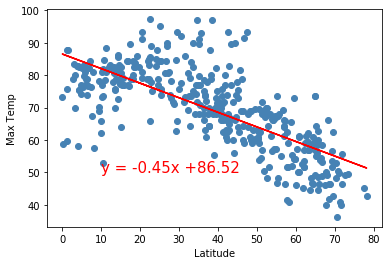

In [20]:
# Create x and y axis
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

fig.savefig("output_data/North_Temp.png")   # save the figure to file

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.57
The rvalue is: 0.75


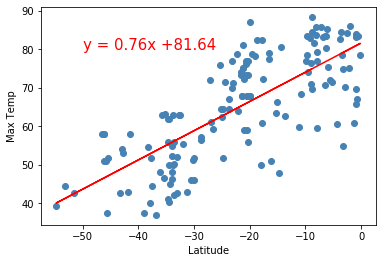

In [21]:
# Create x and y axis
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

fig.savefig("output_data/South_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02
The rvalue is: -0.12


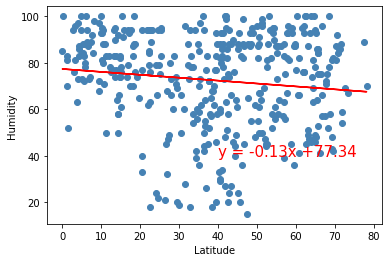

In [22]:
# Create x and y axis
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

fig.savefig("output_data/North_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0
The rvalue is: -0.05


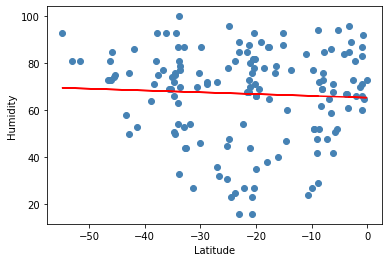

In [23]:
# Create x and y axis
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

fig.savefig("output_data/South_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0
The rvalue is: -0.05


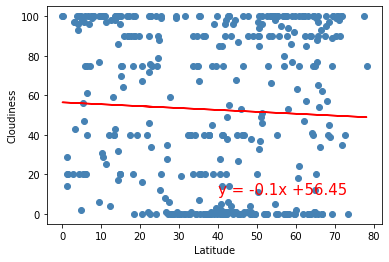

In [24]:
# Create x and y axis
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

fig.savefig("output_data/North_Cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
The rvalue is: 0.07


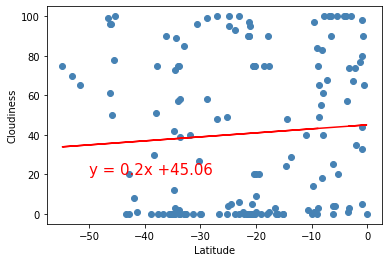

In [25]:
# Create x and y axis
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

fig.savefig("output_data/South_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0
The rvalue is: 0.06


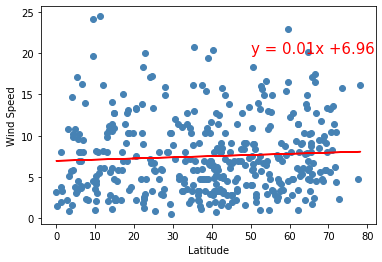

In [26]:
# Create x and y axis
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]  

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

fig.savefig("output_data/North_Cloud.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1
The rvalue is: -0.32


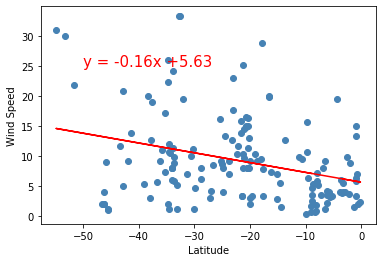

In [27]:
# Create x and y axis
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]  

# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print values for easy reading
print(f'The r-squared is: {round(rvalue**2,2)}')
print(f'The rvalue is: {round(rvalue,2)}')

# Create Plot
fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

fig.savefig("output_data\South_Wind.png")